<a href="https://colab.research.google.com/github/DivyaMeenaSundaram/Deep_Learning_Lab/blob/main/CNN%20vs%20ANN%20%26%20Feature%20maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8791 - loss: 0.4230 - val_accuracy: 0.9595 - val_loss: 0.1359
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9679 - loss: 0.1037 - val_accuracy: 0.9716 - val_loss: 0.0925
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9792 - loss: 0.0676 - val_accuracy: 0.9721 - val_loss: 0.0814
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9843 - loss: 0.0508 - val_accuracy: 0.9744 - val_loss: 0.0835
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9872 - loss: 0.0379 - val_accuracy: 0.9739 - val_loss: 0.0853
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 30ms/step - accuracy: 0.9019 - loss: 0.3229 - val_accuracy: 0.9827 - val_loss: 0.0547
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9838 - loss: 0.0501 - val_accuracy: 0.9867 - val_loss: 0.0428
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 30ms/step - accuracy: 0.9900 - loss: 0.0328 

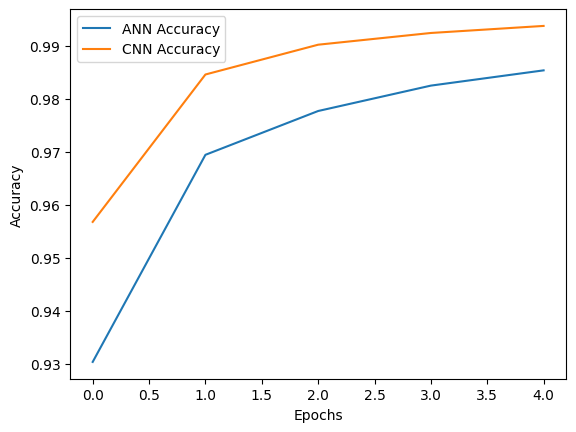

Total parameters in ANN: 109386
Total parameters in CNN: 121930


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset (Handwritten digits 0-9)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images for ANN (28x28 -> 784)
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Define ANN model
ann_model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile ANN
ann_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train ANN
ann_history = ann_model.fit(x_train_flat, y_train, epochs=5, validation_data=(x_test_flat, y_test))

# Define CNN model
cnn_model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile CNN
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape images for CNN (28x28x1)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

# Train CNN
cnn_history = cnn_model.fit(x_train_cnn, y_train, epochs=5, validation_data=(x_test_cnn, y_test))

# Plot accuracy comparison
plt.plot(ann_history.history['accuracy'], label='ANN Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Compare number of parameters
ann_params = ann_model.count_params()
cnn_params = cnn_model.count_params()

print(f"Total parameters in ANN: {ann_params}")
print(f"Total parameters in CNN: {cnn_params}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 693ms/step


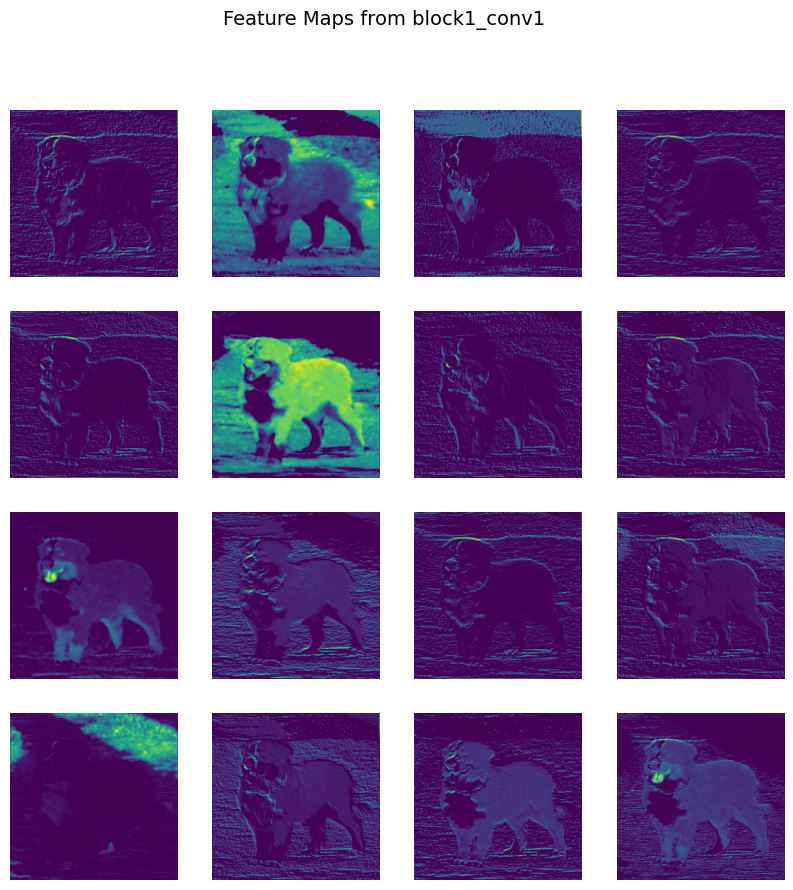

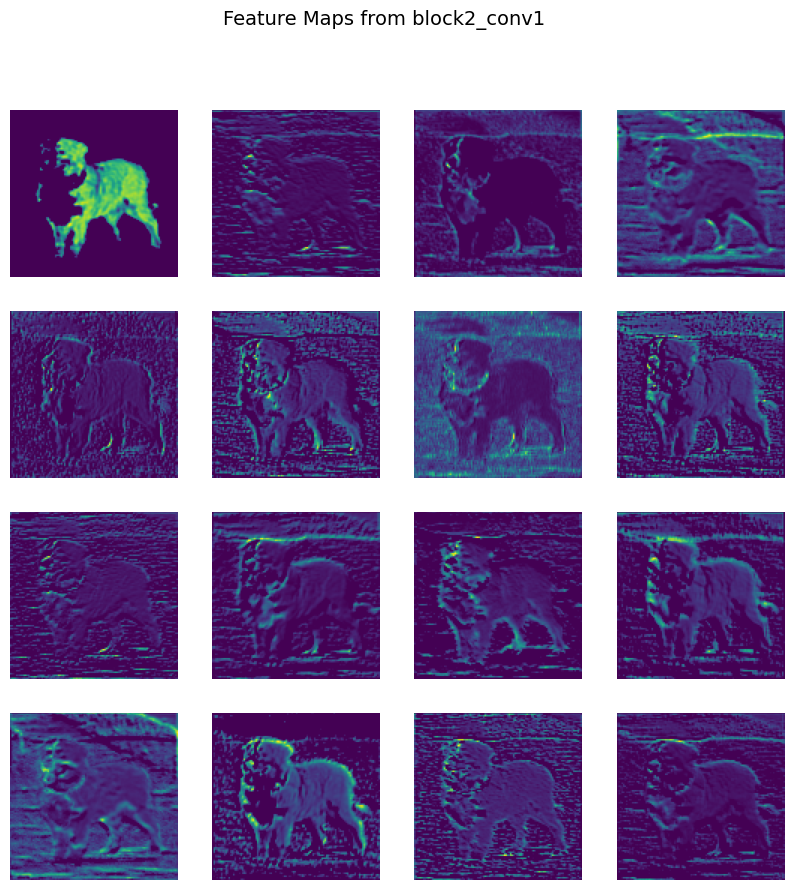

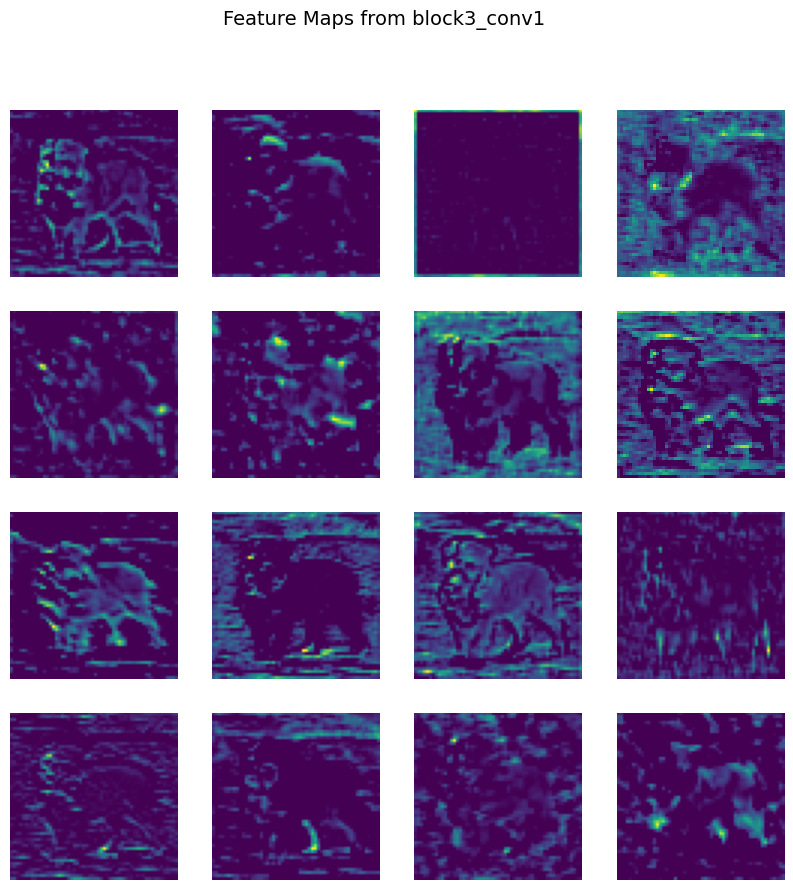

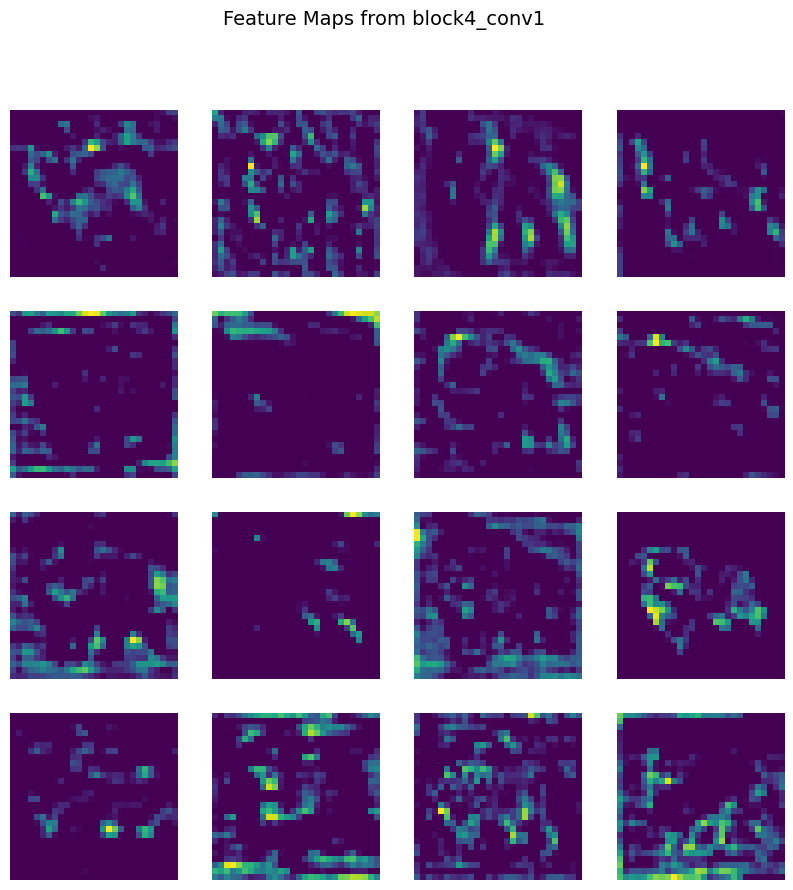

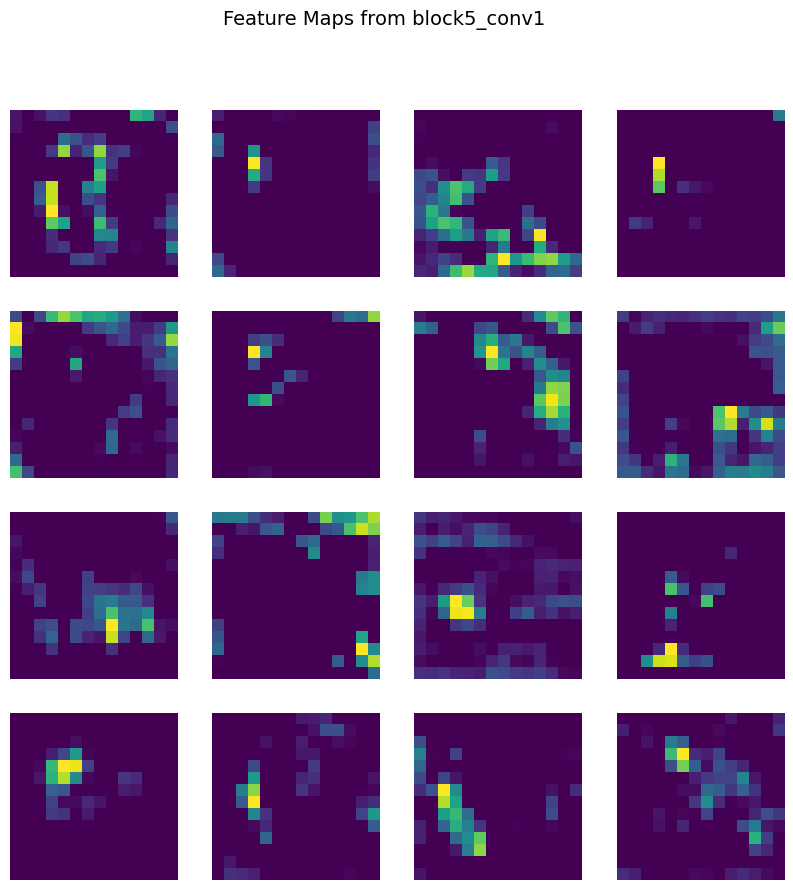

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load pre-trained VGG16 model (without fully connected layers)
model = VGG16(weights="imagenet", include_top=False)

# Select convolutional layers to visualize
layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
layers = [model.get_layer(name).output for name in layer_names]

# Define a model to output selected layer activations
feature_extractor = tf.keras.Model(inputs=model.input, outputs=layers)

# Load and preprocess an input image
img_path = "/content/dog.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Normalize image

# Extract feature maps
feature_maps = feature_extractor.predict(img_array)

# Function to visualize feature maps
def plot_feature_maps(feature_maps, layer_name):
    num_filters = feature_maps.shape[-1]
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # Display 16 filters
    fig.suptitle(f"Feature Maps from {layer_name}", fontsize=14)

    for i, ax in enumerate(axes.flat):
        if i < num_filters:
            ax.imshow(feature_maps[0, :, :, i], cmap="viridis")
            ax.axis("off")

    plt.show()

# Visualizing feature maps from different layers
for fmap, name in zip(feature_maps, layer_names):
    plot_feature_maps(fmap, name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 725ms/step


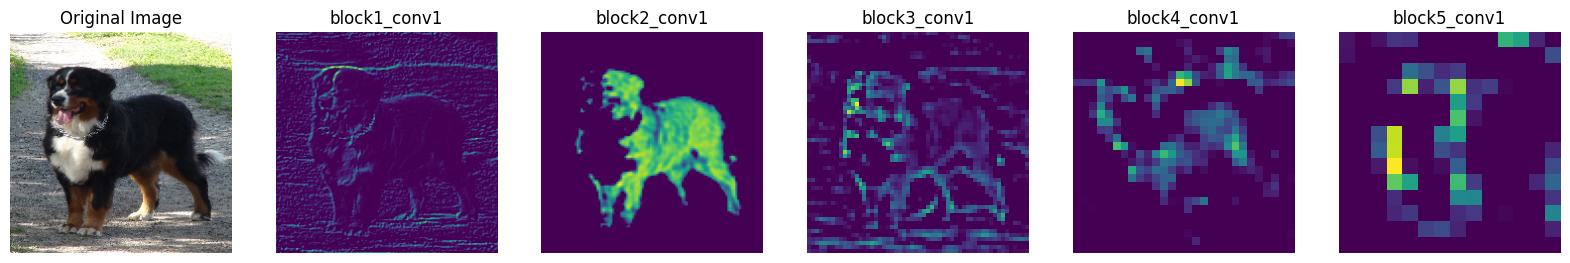

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import requests
from PIL import Image
import io

# Load pre-trained VGG16 model (without fully connected layers)
model = VGG16(weights="imagenet", include_top=False)

# Select convolutional layers to visualize
layer_names = ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']
layers = [model.get_layer(name).output for name in layer_names]

# Define a model to output selected layer activations
feature_extractor = tf.keras.Model(inputs=model.input, outputs=layers)

img_path = "/content/dog.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Normalize image

# Convert image to array and preprocess
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Normalize image

# Extract feature maps
feature_maps = feature_extractor.predict(img_array)

# Function to visualize feature maps side by side
def plot_side_by_side(feature_maps, layer_names):
    fig, axes = plt.subplots(1, len(layer_names) + 1, figsize=(20, 5))

    # Show original image
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    # Show one feature map from each layer
    for i, (fmap, name) in enumerate(zip(feature_maps, layer_names)):
        axes[i + 1].imshow(fmap[0, :, :, 0], cmap="viridis")
        axes[i + 1].set_title(f"{name}")
        axes[i + 1].axis("off")

    plt.show()

# Plot side-by-side comparisons
plot_side_by_side(feature_maps, layer_names)
